In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
from skimage.color import rgb2gray

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 

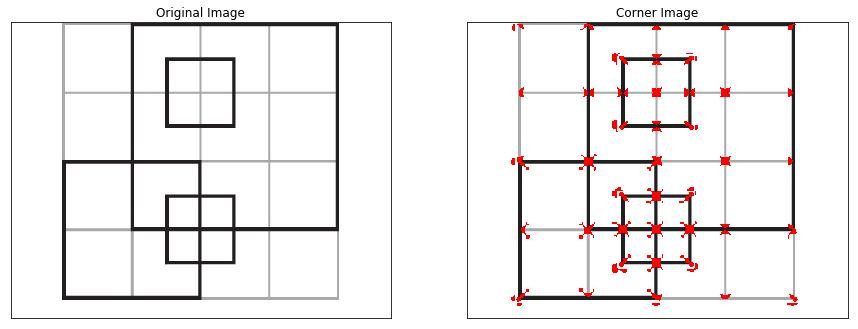

In [2]:
# Define Hariss Corner Detection Function 

def findHarissCorner(image, window_size = 5, k = 0.04, thres = 10000):
    
    # Find image gardient 
    
    # Sobel X and Y derivatives 
    dx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
    dy = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)
    
    # Products of derivatives
    Ixx = dx**2 
    Iyy = dy**2
    Ixy = dx * dy
    
    height = image.shape[0] # image height
    width = image.shape[1] # image width
    
    newImg = image.copy()
    
    color_img = cv2.cvtColor(newImg, cv2.COLOR_GRAY2RGB) # Gray to RGB convert 
    offset = int(window_size / 2) 
    
    #loop over through image and find corners
    for y in range(offset, height-offset):
            for x in range(offset, width-offset):
                
                # Shift Intensity 
                windowIxx = Ixx[y - offset:y + offset + 1, x - offset:x + offset + 1]
                windowIxy = Ixy[y - offset:y + offset + 1, x - offset:x + offset + 1]
                windowIyy = Iyy[y - offset:y + offset + 1, x - offset:x + offset + 1]
                
                # Calculate sum of square 
                Sxx = windowIxx.sum()
                Syy = windowIyy.sum()
                Sxy = windowIxy.sum()
                
                # Find determinant and trace that use to get corners
                det = (Sxx * Syy) - (Sxy**2)
                trace = Sxx + Syy
                
                # Response score 
                R = det - k * (trace**2)
                
                #If corner response is over threshold then color(Red) the point location
                if R > thres:
                    color_img.itemset((y, x, 0), 255)
                    color_img.itemset((y, x, 1), 0)
                    color_img.itemset((y, x, 2), 0)               
    return color_img


img = mpimg.imread('box.jpg') # Read Input Image 
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # RGB to Gray Convert

#np_im = np.array(img) # image to numpy array convert 
#gray = np.float32(gray) # Data (dtype) type conversion

hariss_corners = findHarissCorner(gray, 5, 0.04, 10000)

# Visualization
plt.figure(figsize = (15,15))

plt.subplot(121)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.title("Corner Image")
plt.xticks([]), plt.yticks([])
plt.imshow(hariss_corners)

plt.show()
